# Yahoo Finance
Stock Index, eg, ^GSPC
Curreny Exchange rate, e.g, GBPUSD=X
Options, 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import yfinance as yf

#single Stock
apple = yf.download('AAPL', 
                       start='2000-01-01', 
                       end='2021-12-31')


[*********************100%***********************]  1 of 1 completed


In [3]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.854541,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.782495,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.793945,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.725238,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.759592,460734400


# You can also get other stock data, eg, minute-by-minute, or monthly ...

In [5]:
#Several stocks
tickers =['AAPL','AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']

start_date='2000-01-01'
end_date='2021-12-31'

df_yf=yf.download(
        # tickers list or string as well
        tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC (open, high, low, closing) automatically
        # (optional, default is False)
        #auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  8 of 8 completed


In [6]:
df_yf.head

<bound method NDFrame.head of                   AMZN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-03  167.550003  170.703506  166.160507  170.404495  170.404495   
2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522003   
2022-01-05  166.882996  167.126495  164.356995  164.356995  164.356995   
2022-01-06  163.450500  164.800003  161.936996  163.253998  163.253998   
2022-01-07  163.839005  165.243500  162.031006  162.554001  162.554001   
...                ...         ...         ...         ...         ...   
2022-06-06  125.250000  128.990005  123.809998  124.790001  124.790001   
2022-06-07  122.010002  124.099998  120.629997  123.000000  123.000000   
2022-06-08  122.610001  123.750000  120.750000  121.180000  121.180000   
2022-06-09  119.989998  121.300003  116.099998  116.150002  116.150002   
2022-06-

<AxesSubplot:xlabel='Date'>

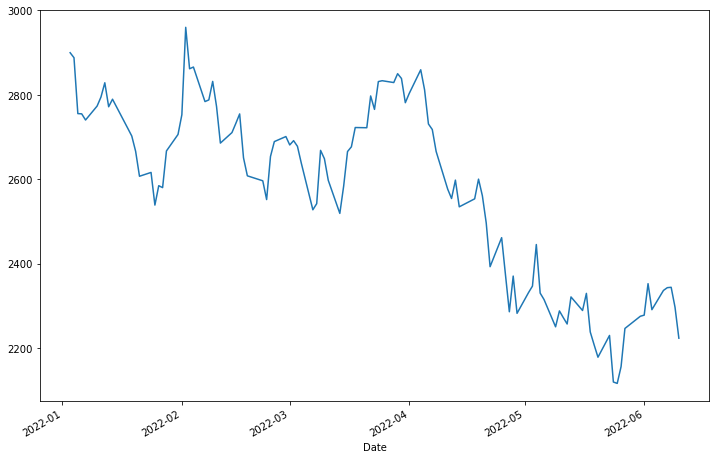

In [7]:
df_yf.GOOGL['Adj Close'].plot(figsize=(12,8))

In [8]:
df_yf=yf.download('GOOGL', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [9]:
df_yf.head

<bound method NDFrame.head of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2004-08-19    50.050049    52.082081    48.028027    50.220219    50.220219   
2004-08-20    50.555557    54.594597    50.300301    54.209209    54.209209   
2004-08-23    55.430431    56.796799    54.579578    54.754753    54.754753   
2004-08-24    55.675674    55.855858    51.836838    52.487488    52.487488   
2004-08-25    52.532532    54.054054    51.991993    53.053055    53.053055   
...                 ...          ...          ...          ...          ...   
2021-12-23  2930.000000  2964.870117  2929.040039  2938.330078  2938.330078   
2021-12-27  2945.120117  2966.879883  2943.389893  2958.129883  2958.129883   
2021-12-28  2964.719971  2965.979980  2921.090088  2933.739990  2933.739990   
2021-12-29  2932.889893  2948.340088  2912.949951  2933.100098  2933.100098   
2021-12-30  2933.87988

<AxesSubplot:xlabel='Date'>

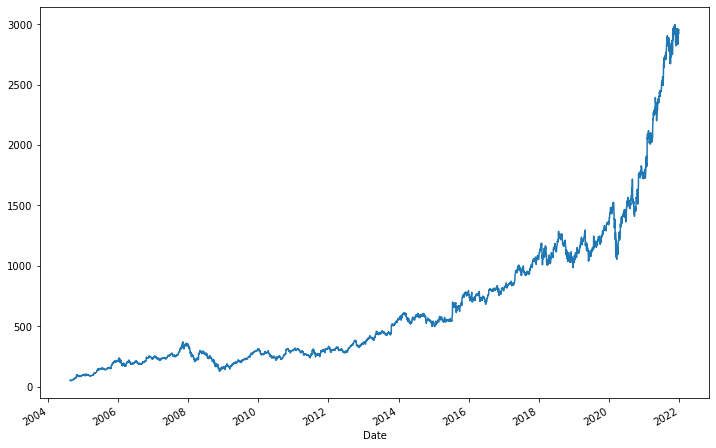

In [8]:
df_yf['Adj Close'].plot(figsize=(12,8))

# You can also use pandas_datareader

In [11]:
from pandas_datareader import data

# Fetch daily data for 4 years
symbol='GOOG'
start_date = '2000-01-01'
end_date = '2021-12-31'

df_pd = data.DataReader(symbol, 'yahoo', start_date, end_date)
df_pd.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


<AxesSubplot:xlabel='Date'>

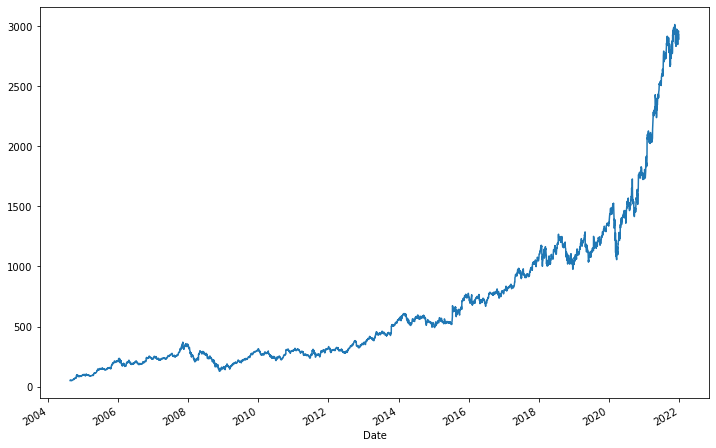

In [13]:
df_pd['Adj Close'].plot(figsize=(12,8))

# You can also get company info

In [14]:

aapl=yf.Ticker('AAPL')

In [15]:
aapl.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [16]:
aapl.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0
1980-12-17,0.090160,0.090596,0.090160,0.090160,86441600,0.0,0.0
1980-12-18,0.092774,0.093210,0.092774,0.092774,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-06-06,147.029999,148.570007,144.899994,146.139999,71598400,0.0,0.0
2022-06-07,144.350006,149.000000,144.100006,148.710007,67808200,0.0,0.0
2022-06-08,148.580002,149.869995,147.460007,147.960007,53950200,0.0,0.0


# List the dividend payments and stock splits:  corporate action

In [17]:
aapl.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0
...,...,...
2021-05-07,0.220000,0.0
2021-08-06,0.220000,0.0
2021-11-05,0.220000,0.0


In [17]:
aapl.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
Name: Dividends, Length: 74, dtype: float64

In [22]:
aapl.splits

Date
1987-06-16    2.0
2000-06-21    2.0
2005-02-28    2.0
2014-06-09    7.0
2020-08-31    4.0
Name: Stock Splits, dtype: float64

# PE ratio, etc

In [18]:
aapl.info['forwardPE']

20.903965

In [19]:
aapl.info['trailingPE']

22.344795

# Download Futures Price 

[*********************100%***********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

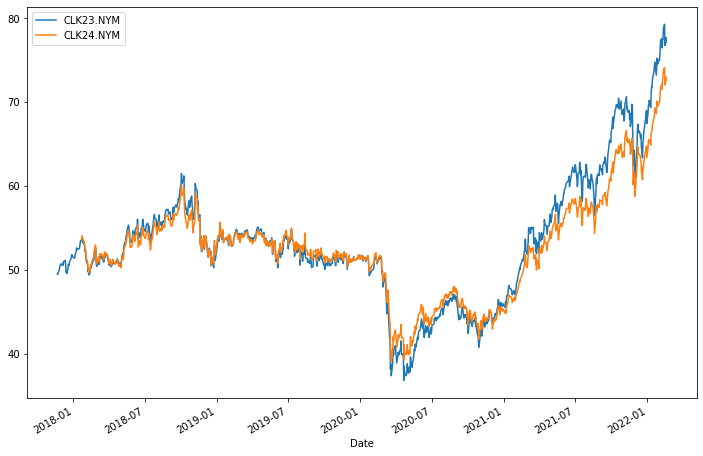

In [21]:
data = yf.download("CLK23.NYM, CLK24.NYM", start="2015-01-01", end="2022-02-18") 
data['Close'].plot(figsize=(12,8)) 


In [26]:
#May 2020 Crude Oil Futures
#data = yf.download("CLK20.NYM")
#data.head

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- CLK20.NYM: No data found, symbol may be delisted


<bound method NDFrame.head of Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []>

# Download options data using yfinance
## First, let us look at what maturity dates are traded

In [22]:
#expiry dates for options for a particular ticker 
aapl.options

('2022-06-17',
 '2022-06-24',
 '2022-07-01',
 '2022-07-08',
 '2022-07-15',
 '2022-07-22',
 '2022-07-29',
 '2022-08-19',
 '2022-09-16',
 '2022-10-21',
 '2022-11-18',
 '2022-12-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2023-09-15',
 '2024-01-19',
 '2024-06-21')

In [23]:
#Also allook at SP500 
spx=yf.Ticker('^SPX')
spx.info

{'exchange': 'WCB',
 'shortName': 'S&P 500 INDEX',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-14400000',
 'underlyingSymbol': '^GSPC',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'market': 'us_market',
 'previousClose': 4017.82,
 'regularMarketOpen': 3974.39,
 'twoHundredDayAverage': None,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 3974.39,
 'navPrice': None,
 'averageDailyVolume10Day': None,
 'totalAssets': None,
 'regularMarketPreviousClose': 4017.82,
 'fiftyDayAverage': None,
 'trailingAnnualDividendRate': None,
 'open': 3974.39,
 'toCurrency': None,
 'averageVolume10days': None,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 3900.16,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVo

In [28]:
spx.options

('2022-03-02',
 '2022-03-04',
 '2022-03-07',
 '2022-03-09',
 '2022-03-11',
 '2022-03-14',
 '2022-03-16',
 '2022-03-18',
 '2022-03-21',
 '2022-03-23',
 '2022-03-25',
 '2022-03-28',
 '2022-03-31',
 '2022-04-01',
 '2022-04-08',
 '2022-04-14',
 '2022-04-29',
 '2022-05-20',
 '2022-05-31',
 '2022-06-17',
 '2022-06-30',
 '2022-07-15',
 '2022-07-29',
 '2022-08-19',
 '2022-09-16',
 '2022-09-30',
 '2022-10-21',
 '2022-11-18',
 '2022-12-16',
 '2022-12-30',
 '2023-01-20',
 '2023-02-17',
 '2023-03-17',
 '2023-06-16',
 '2023-12-15',
 '2024-12-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18')

In [29]:
#Options expiring on a particular date - OPtion Chain
opt_chain = aapl.option_chain(date='2022-08-19')
opt_chain

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   AAPL220819C00080000 2022-02-17 18:50:16+00:00    80.0      90.73  83.65   
1   AAPL220819C00085000 2022-02-02 20:15:33+00:00    85.0      90.78  78.65   
2   AAPL220819C00090000 2022-02-24 15:08:20+00:00    90.0      66.85  74.00   
3   AAPL220819C00095000 2022-02-02 16:59:42+00:00    95.0      79.99  69.05   
4   AAPL220819C00100000 2022-02-17 14:40:31+00:00   100.0      72.71  64.00   
5   AAPL220819C00105000 2022-02-25 15:53:34+00:00   105.0      59.96  59.95   
6   AAPL220819C00110000 2022-02-28 17:17:00+00:00   110.0      56.05  55.50   
7   AAPL220819C00115000 2022-02-24 14:35:14+00:00   115.0      42.41  50.30   
8   AAPL220819C00120000 2022-02-28 20:33:36+00:00   120.0      46.10  46.25   
9   AAPL220819C00125000 2022-02-24 18:17:27+00:00   125.0      37.65  41.85   
10  AAPL220819C00130000 2022-02-28 16:26:14+00:00   130.0      38.95  37.95   
11  AAPL220819C00135000 2022-02-28 16:

In [30]:
opt_chain.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL220819C00080000,2022-02-17 18:50:16+00:00,80.0,90.73,83.65,87.70,0.000000,0.000000,2,109,0.569340,True,REGULAR,USD
1,AAPL220819C00085000,2022-02-02 20:15:33+00:00,85.0,90.78,78.65,82.80,0.000000,0.000000,12,108,0.535161,True,REGULAR,USD
2,AAPL220819C00090000,2022-02-24 15:08:20+00:00,90.0,66.85,74.00,78.25,0.000000,0.000000,3,53,0.545903,True,REGULAR,USD
3,AAPL220819C00095000,2022-02-02 16:59:42+00:00,95.0,79.99,69.05,73.25,0.000000,0.000000,1,133,0.506597,True,REGULAR,USD
4,AAPL220819C00100000,2022-02-17 14:40:31+00:00,100.0,72.71,64.00,68.75,0.000000,0.000000,1,3,0.646488,True,REGULAR,USD
5,AAPL220819C00105000,2022-02-25 15:53:34+00:00,105.0,59.96,59.95,63.80,0.000000,0.000000,2,178,0.599980,True,REGULAR,USD
6,AAPL220819C00110000,2022-02-28 17:17:00+00:00,110.0,56.05,55.50,59.15,-0.350002,-0.620571,5,112,0.569584,True,REGULAR,USD
7,AAPL220819C00115000,2022-02-24 14:35:14+00:00,115.0,42.41,50.30,54.20,0.000000,0.000000,1,9,0.525395,True,REGULAR,USD
8,AAPL220819C00120000,2022-02-28 20:33:36+00:00,120.0,46.10,46.25,50.00,0.099998,0.217388,12,511,0.513066,True,REGULAR,USD
9,AAPL220819C00125000,2022-02-24 18:17:27+00:00,125.0,37.65,41.85,45.15,0.000000,0.000000,3,24,0.473089,True,REGULAR,USD


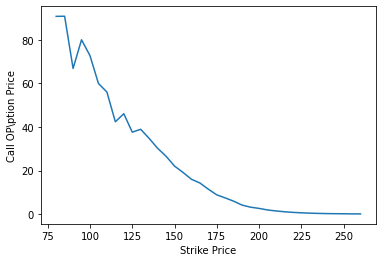

In [31]:
plt.plot(opt_chain.calls.strike, opt_chain.calls.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Call OP\ption Price')
plt.show()

In [32]:
opt_chain.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL220819P00080000,2022-02-23 20:48:57+00:00,80.0,0.54,0.33,0.58,0.000000,0.000000,6.0,748,0.551274,False,REGULAR,USD
1,AAPL220819P00085000,2022-02-23 15:29:14+00:00,85.0,0.61,0.45,0.73,0.000000,0.000000,20.0,1275,0.533208,False,REGULAR,USD
2,AAPL220819P00090000,2022-02-28 20:37:38+00:00,90.0,0.78,0.52,0.89,0.020000,2.631576,3.0,526,0.509282,False,REGULAR,USD
3,AAPL220819P00095000,2022-02-28 15:32:22+00:00,95.0,0.94,0.75,1.15,-0.090000,-8.737862,2.0,445,0.519292,False,REGULAR,USD
4,AAPL220819P00100000,2022-02-28 20:36:29+00:00,100.0,1.24,0.92,1.29,0.150000,13.761465,1.0,1605,0.490972,False,REGULAR,USD
5,AAPL220819P00105000,2022-02-24 18:50:49+00:00,105.0,1.80,1.13,1.65,0.000000,0.000000,20.0,251,0.478765,False,REGULAR,USD
6,AAPL220819P00110000,2022-02-28 17:51:46+00:00,110.0,1.81,1.55,1.91,-0.680000,-27.309238,1.0,523,0.455816,False,REGULAR,USD
7,AAPL220819P00115000,2022-02-25 17:51:52+00:00,115.0,2.00,1.86,2.27,0.000000,0.000000,22.0,717,0.436773,False,REGULAR,USD
8,AAPL220819P00120000,2022-02-28 20:57:52+00:00,120.0,2.60,2.09,2.92,0.150000,6.122443,78.0,340,0.429205,False,REGULAR,USD
9,AAPL220819P00125000,2022-02-28 19:34:14+00:00,125.0,3.45,2.65,3.55,0.400000,13.114758,24.0,719,0.415533,False,REGULAR,USD


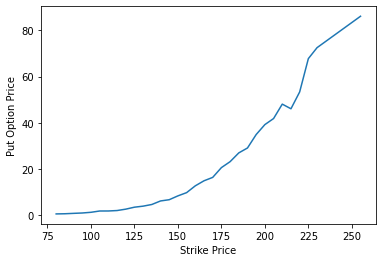

In [33]:
plt.plot(opt_chain.puts.strike, opt_chain.puts.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Put Option Price')
plt.show()

#  Stock Indices
 
 ## Dow-Jones Industrial Average

In [76]:
import pandas as pd

# There are 2 tables on the Wikipedia page,  we want the second table
#First table: description

components = \
pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Components')

first_table = components[0]
second_table = components[1]
df = second_table
df

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.02%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.60%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.25%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.96%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,3.74%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.53%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,1.03%
8,Coca-Cola,NYSE,KO,Soft Drink,1987-03-12,Also 1932-05-26 to 1935-11-20,1.15%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,2.65%


# Market Cap

In [77]:
for symbol in df['Symbol']:
    sys=symbol.replace('.', '-')  #BRk.B --> BRK-B
    info = yf.Ticker(sys).info
    marketcap = info['marketCap']    
    print(symbol, 'Market Cap: ', marketcap)

MMM Market Cap:  82067070976
AXP Market Cap:  143024521216
AMGN Market Cap:  122139746304
AAPL Market Cap:  2655819137024
BA Market Cap:  115684687872
CAT Market Cap:  98973155328
CVX Market Cap:  259949002752
CSCO Market Cap:  227357720576
KO Market Cap:  262339280896
DIS Market Cap:  272002105344
DOW Market Cap:  43203063808
GS Market Cap:  113479892992
HD Market Cap:  327097712640
HON Market Cap:  125052231680
IBM Market Cap:  109324148736
INTC Market Cap:  190243848192
JNJ Market Cap:  415792758784
JPM Market Cap:  426828693504
MCD Market Cap:  183097442304
MRK Market Cap:  185681854464
MSFT Market Cap:  2208502906880
NKE Market Cap:  216906907648
PG Market Cap:  363779325952
CRM Market Cap:  201225650176
TRV Market Cap:  40209915904
UNH Market Cap:  428946456576
VZ Market Cap:  220763357184
V Market Cap:  467649200128
WBA Market Cap:  39080325120
WMT Market Cap:  373170077696


In [79]:
dd=pd.DataFrame(df)['Index weighting'].str.replace('%','')
pd.to_numeric(dd).sum()

99.95

In [80]:
df[['Company', 'Symbol']]

,Company,Symbol
0,3M,MMM
1,American Express,AXP
2,Amgen,AMGN
3,Apple,AAPL
4,Boeing,BA
5,Caterpillar,CAT
6,Chevron,CVX
7,Cisco,CSCO
8,Coca-Cola,KO
9,Disney,DIS


# Last Close price

In [81]:
import yfinance as yf

for symbol in df['Symbol']:
    ticker_yahoo = yf.Ticker(symbol)
    data = ticker_yahoo.history(period='1d')
    last_quote = (data.tail(1)['Close'].iloc[0])
    print(symbol,round(last_quote,2))
    

MMM 143.7
AXP 188.35
AMGN 219.27
AAPL 162.74
BA 198.43
CAT 184.69
CVX 134.85
CSCO 54.73
KO 60.51
DIS 149.4
DOW 58.72
GS 340.19
HD 313.24
HON 182.34
IBM 121.97
INTC 46.72
JNJ 158.14
JPM 144.55
MCD 245.03
MRK 73.51
MSFT 294.59
NKE 137.17
PG 151.76
CRM 204.29
TRV 166.5
UNH 455.89
VZ 52.59
V 217.3
WBA 45.27
WMT 134.53


## S&P 500 Stocks Composite Index

In [62]:
import pandas as pd

# There are 2 tables on the Wikipedia page, we want the first table
# second table shows the evolution of the changes

components = \
pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')

first_table = components[0]
second_table = components[1]
sp_df = first_table
sp_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [72]:
sp_df[200:250]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
200,FISV,Fiserv,reports,Information Technology,Data Processing & Outsourced Services,"Brookfield, Wisconsin",2001-04-02,798354,1984
201,FLT,Fleetcor,reports,Information Technology,Data Processing & Outsourced Services,"Norcross, Georgia",2018-06-20,1175454,2000
202,FMC,FMC,reports,Materials,Fertilizers & Agricultural Chemicals,"Philadelphia, Pennsylvania",2009-08-19,37785,1883
203,F,Ford,reports,Consumer Discretionary,Automobile Manufacturers,"Dearborn, Michigan",1957-03-04,37996,1903
204,FTNT,Fortinet,reports,Information Technology,Systems Software,"Sunnyvale, California",2018-10-11,1262039,2000
205,FTV,Fortive,reports,Industrials,Industrial Machinery,"Everett, Washington",2016-07-01,1659166,2016
206,FBHS,Fortune Brands,reports,Industrials,Building Products,"Deerfield, Illinois",2016-06-22,1519751,2011 (1969)
207,FOXA,Fox Corporation (Class A),reports,Communication Services,Movies & Entertainment,"New York City, New York",2013-07-01,1754301,2019
208,FOX,Fox Corporation (Class B),reports,Communication Services,Movies & Entertainment,"New York City, New York",2015-09-18,1754301,2019
209,BEN,Franklin Templeton,reports,Financials,Asset Management & Custody Banks,"San Mateo, California",NaN,38777,1947


In [87]:
yf.Ticker('INFO').history(period='1d')['Close']

- INFO: No data found for this date range, symbol may be delisted


Series([], Name: Close, dtype: float64)

# Last Closing Price

In [98]:

import warnings
warnings.filterwarnings("ignore")

## For some reason INFO has no data

SP500_Current_Price=[]

for symbol in sp_df['Symbol']:
    try:
    #if symbol != 'INFO':
        sym=symbol.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(sym)
        data = ticker_yahoo.history(period='1d')
        last_quote = (data.tail(1)['Close'].iloc[0])
        SP500_Current_Price.append(
            {
                #     'Company':sym['Security'],
                "Ticker":sym,
                "Last Closing":last_quote
            }
        )
    except:
        pass
    
SP500_Current_Price=pd.DataFrame(SP500_Current_Price)
            
    #print(symbol,round(last_quote,2))

In [104]:
SP500_Current_Price[:20]

,Ticker,Last Closing
0,MMM,148.649994
1,AOS,68.580002
2,ABT,120.620003
3,ABBV,147.770004
4,ABMD,310.739990
5,ACN,316.019989
6,ATVI,81.500000
7,ADM,78.449997
8,ADBE,467.679993
9,ADP,204.440002
